# Proyecto final Bedu: Machine Learning aplicado a vehículos usados.

## Introducción

En este notebook trabajaremos con datasets de autos usados, donde usaremos métodos de Machine Learning de agrupación y predicción. La variable a predecir será el precio del auto.

Empezamos importando las librerías necesarias y los datasets necesarios para juntarlos en uno solo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('/Users/Casa/Machine-Learning/ProyectoML/df_car-prices.csv', index_col=0)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi


Ahora con nuestros datos limpios y sin valores atípicos podemos empezar a trabajar.

## Predicción

Separamos las variables numéricas.

In [4]:
df= data.select_dtypes(include='number')
sns.set(style="whitegrid")

Empecemos por ver qué variables muestran cierta correlación.

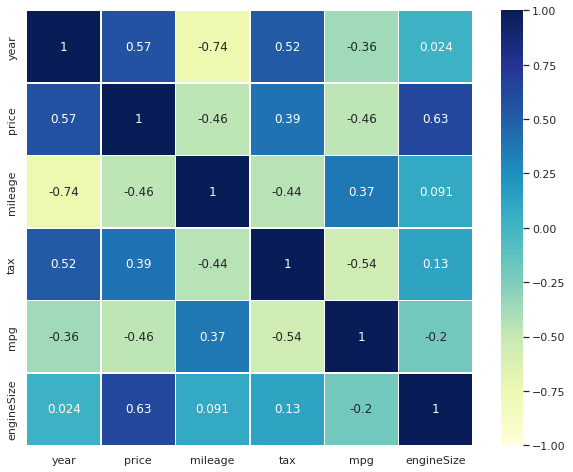

In [16]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

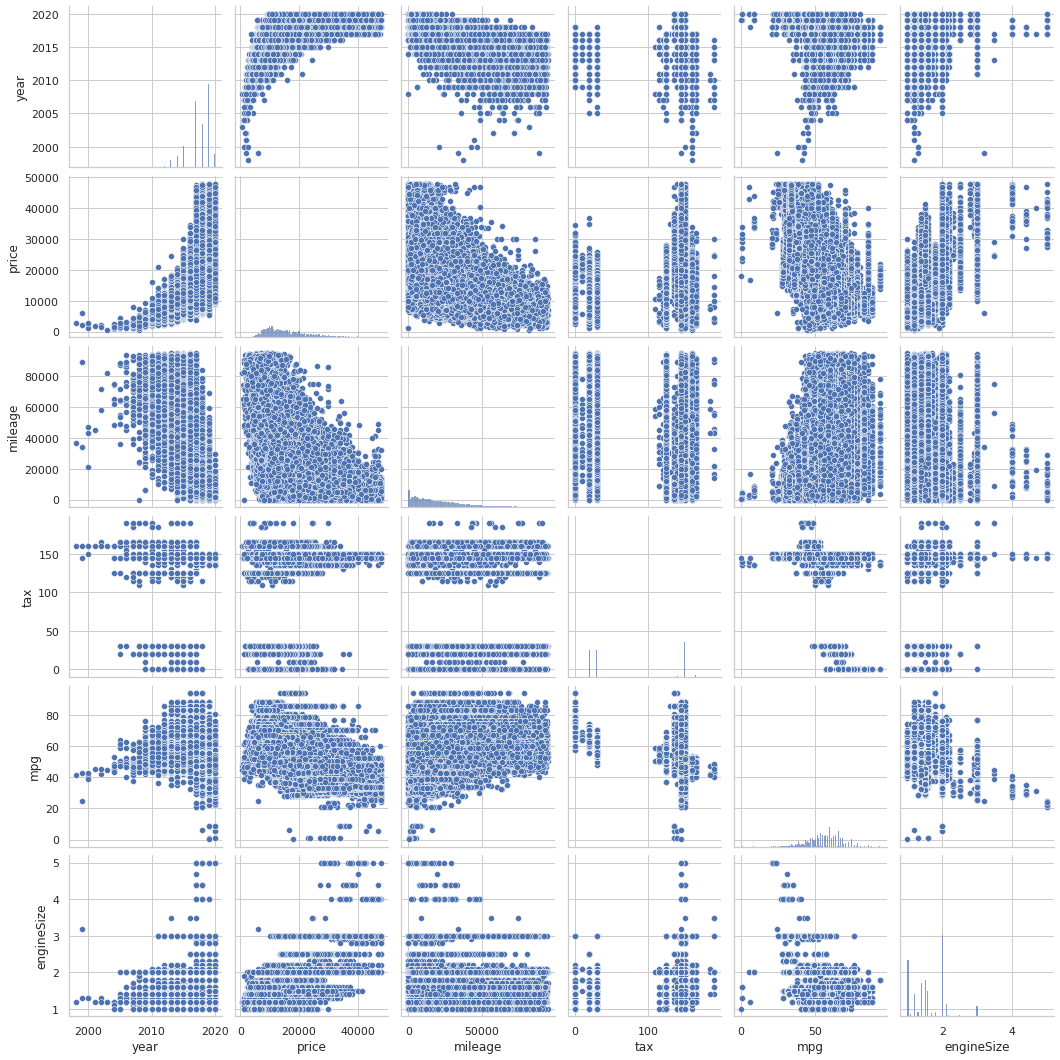

In [17]:
sns.set(style="whitegrid")
sns.pairplot(df.select_dtypes('number'));

El precio tiene la correlación más fuerte con engineSize, aunque también es alta con el año, el millaje y las millas por galón.
Intentemos primero crear modelos de regresión con todos los datos y después hacemos pruebas con solo esas variables. Empezamos separando los datos en datos de entrenamiento y prueba.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.select_dtypes('number').drop(columns='price')
y = df['price']

In [12]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2,random_state =42)

## Regresión lineal

Primero veamos qué tal lo hace una regresión lineal.

In [80]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [82]:
regressor.score(x_test,y_test)

0.7505686149385877

Para evaluar visualmente el modelo con el conjunto de prueba, creemos una gráfica de distribución. 

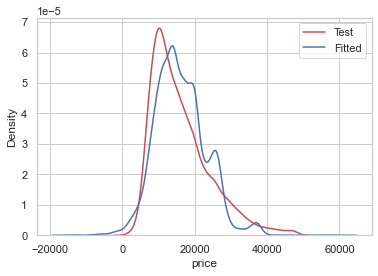

In [83]:
y_head = regressor.predict(x_test)

ax = sns.kdeplot(y_test, color='r', label = 'Test')
sns.kdeplot(y_head, color='b', label = 'Fitted', ax=ax)
plt.legend();

In [84]:
from sklearn.model_selection import cross_validate
scores = cross_validate(linear_regression, X, y, scoring='r2')
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.536 +/- 0.241


## Regresión polinomial

¡No está nada mal! Ahora intentaremos con una regresión polinomial. Intentemos con polinomios de varios grados.

In [66]:
from sklearn.preprocessing import PolynomialFeatures

polynominal_regression = PolynomialFeatures(degree=3)

In [67]:
x_polynomial = polynominal_regression.fit_transform(x_train,y_train)

In [68]:
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y_train)

LinearRegression()

In [69]:
# Calculemos el R^2

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_train,y_head2_train))

r_square score:  0.7949417490624178


Ahora veamos en el conjunto de prueba

In [70]:
x_polynomial_test = polynominal_regression.fit_transform(x_test,y_test)

In [71]:
y_head2_test = linear_regression.predict(x_polynomial_test)

In [72]:
print("r_square score: ", r2_score(y_test,y_head2_test))

r_square score:  0.799808682719233


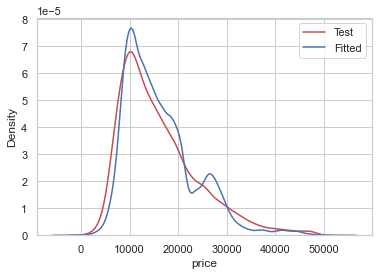

In [73]:
y_head2_train = linear_regression.predict(x_polynomial)

ax = sns.kdeplot(y_test, color='r', label = 'Test')
sns.kdeplot(y_head2_train, color='b', label = 'Fitted', ax=ax)
plt.legend();

Validación

Aún mejor que la regresión lineal, aunque claro que un polinomio de grado 3 de 5 variables tiene muchos más terminos (56) que una regresión lineal (5).

## Red neuronal

Ahora veamos si podemos entrenar una red neuronal que nos de mejores resultados.

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
from sklearn.preprocessing import MinMaxScaler

Primero, por la naturaleza de las redes neuronales, es necesario hacer una normalización de nuestros datos para que el entrenamiento sea mejor.

In [23]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
y_train=np.reshape(y_train.values, (-1,1))
y_test=np.reshape(y_test.values, (-1,1))

scaler_x.fit(x_train)
x_train_scaled= scaler_x.transform(x_train)
scaler_x.fit(x_test)
x_test_scaled = scaler_x.transform(x_test)

scaler_y.fit(y_train)
y_train_scaled = scaler_y.transform(y_train)
scaler_y.fit(y_test)
y_test_scaled = scaler_y.transform(y_test)


Ya que tenemos nuestros datos escalados, podemos generar nuestra red neuronal, la cual haré con una sola capa oculta con un gran número de neuronas debido al gran número de datos.

In [ ]:
red_neuronal = Sequential()
red_neuronal.add(Dense(6, input_dim=5, activation="relu"))
red_neuronal.add(Dense(2685, activation="relu"))
red_neuronal.add(Dense(1, activation="sigmoid"))

In [ ]:
red_neuronal.compile(loss="mse", optimizer="adam",  metrics=['mse','mae'])

In [ ]:
history = red_neuronal.fit(x_train_scaled,y_train_scaled, epochs=30, batch_size= 200, validation_split=0.2)

Epoch 1/30
290/290 [==============================] - 2s 6ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0883 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0621
Epoch 2/30
290/290 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0617 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0615
Epoch 3/30
290/290 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0607 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0596
Epoch 4/30
290/290 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0600 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0587
Epoch 5/30
290/290 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0596 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0583
Epoch 6/30
290/290 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0591 - val_loss: 0.0059 - val_mse: 0.0059 - val_mae: 0.0580
Epoch 7/30
290/2

Ahora que entrenamos a nuestra red veamos cómo fue el entrenamiento.

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


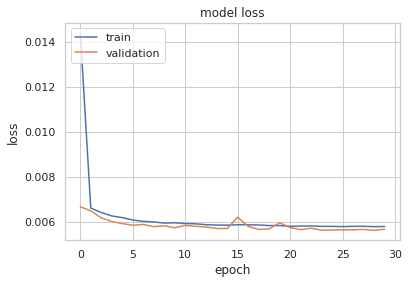

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

A primera vista parece que después de 23 épocas la pérdida se mantiene, ahora veamos qué tan buena es nuestra red para predecir con datos nuevos.

In [ ]:
predictions = red_neuronal.predict(x_test_scaled)

Transformamos las predicciones para compararlas con los datos de prueba.

In [ ]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[16245.848],
       [11814.038],
       [27129.93 ],
       ...,
       [12484.494],
       [17725.547],
       [11212.826]], dtype=float32)

In [ ]:
print("r_square score: ", r2_score(y_test,predictions))

r_square score:  0.8023581376083049


La $R^2$ es aún mayor que en nuestros modelos anteriores, pero veamos también cuánto vale el RMSE.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [ ]:
mean_absolute_error(y_test, predictions)

2698.0973355738147

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

3577.1449553537263

In [ ]:
y_test.mean()

16124.13004137931

In [ ]:
predictions.mean()

16181.628

Vemos que el RMSE está bastante alejado de la media, por lo que las redes hicieron un buen trabajo.

En la red anterior usamos todas las variables numéricas, pero veamos cuánto cambia si quitamos la variable *tax*, que es la que tiene la menor correlación con el precio.

### Red neuronal con menos variables

In [27]:
X_reduced = X.drop(columns='tax').copy()
x_train_reduced , x_test_reduced , y_train2 , y_test2 = train_test_split(X_reduced , y , test_size = 0.2,random_state =42)

In [32]:
scaler_x2 = MinMaxScaler()
scaler_y2 = MinMaxScaler()
y_train2 = np.reshape(y_train2.values, (-1,1))
y_test2 = np.reshape(y_test2.values, (-1,1))

scaler_x2.fit(x_train_reduced)
x_train_scaled2= scaler_x2.transform(x_train_reduced)
scaler_x2.fit(x_test_reduced)
x_test_scaled2 = scaler_x2.transform(x_test_reduced)

scaler_y2.fit(y_train2)
y_train_scaled2 = scaler_y2.transform(y_train2)
scaler_y2.fit(y_test2)
y_test_scaled2 = scaler_y2.transform(y_test2)


In [33]:
red_neuronal2 = Sequential()
red_neuronal2.add(Dense(5, input_dim=4, activation="relu"))
red_neuronal2.add(Dense(2071, activation="relu"))
red_neuronal2.add(Dense(1, activation="sigmoid"))

In [34]:
red_neuronal2.compile(loss="mse", optimizer="adam",  metrics=['mse','mae'])

In [35]:
history2 = red_neuronal2.fit(x_train_scaled2,y_train_scaled2, epochs=30, batch_size= 200, validation_split=0.2)

Epoch 1/30
290/290 [==============================] - 2s 6ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.1036 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0776
Epoch 2/30
290/290 [==============================] - 1s 5ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0735 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0695
Epoch 3/30
290/290 [==============================] - 1s 5ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0668 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0646
Epoch 4/30
290/290 [==============================] - 1s 5ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0641 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0629
Epoch 5/30
290/290 [==============================] - 1s 5ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0620 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0603
Epoch 6/30
290/290 [==============================] - 1s 5ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0599 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0593
Epoch 7/30
290/2

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


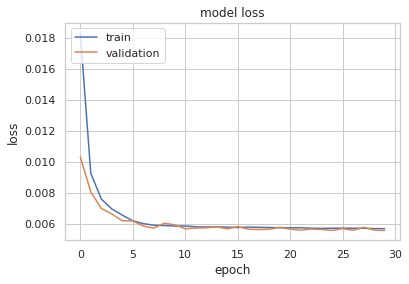

In [36]:
print(history2.history.keys())
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
predictions2 = red_neuronal2.predict(x_test_scaled2)

In [38]:
predictions2 = scaler_y2.inverse_transform(predictions2)
predictions2

array([[16454.857],
       [12261.644],
       [27338.525],
       ...,
       [12173.293],
       [18301.576],
       [11151.566]], dtype=float32)

In [39]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test2,predictions2))

r_square score:  0.8057234430043355


De hecho nuestra $R^2$ fue ligeramente mejor que en la red anterior, veamos la RMSE.

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [41]:
mean_absolute_error(y_test2, predictions2)

2673.4448685412176

In [42]:
np.sqrt(mean_squared_error(y_test2, predictions2))

3546.559657104822

In [43]:
y_test2.mean()

16124.13004137931

In [44]:
predictions2.mean()

16367.261

También fue ligeramente mejor, aunque tal vez no haya valido tanto la pena perder el tiempo en otra red. Evaluemos ahora con otra herramienta de Machine Learning para ver si puede darnos mejores resultados que esta red neuronal.

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

Intentemos con un valor de prueba de 10 estimadores.

In [65]:
modelo_forest = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 50
         )

In [66]:
modelo_forest.fit(x_train, y_train.transpose()[0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [72]:
predicciones_forest = modelo_forest.predict(X = x_test)

rmse = mean_squared_error(
        y_true  = y_test.transpose()[0],
        y_pred  = predicciones_forest,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 2924.665540845793


Vemos que sin mucho esfuerzo, ¡el RMSR es menor! Ahora veamos si podemos mejorar aún más esto buscando los mejores hiperparámetros.

Valor óptimo de n_estimators: 96


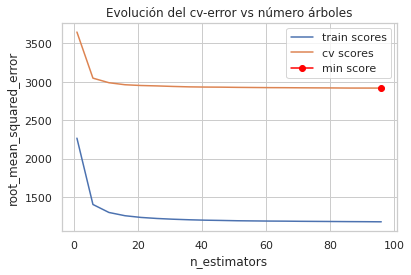

In [74]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 100, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 50
             )
    
    # Error de train
    modelo.fit(x_train, y_train.transpose()[0])
    predicciones = modelo.predict(X = x_train)
    rmse = mean_squared_error(
            y_true  = y_train.transpose()[0],
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = x_train,
                y         = y_train.transpose()[0],
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Parece que el mejor valor sería 100, por lo que podríamos usar un valor más grande pero nos quedaremos con ese.

Valor óptimo de max_features: 4


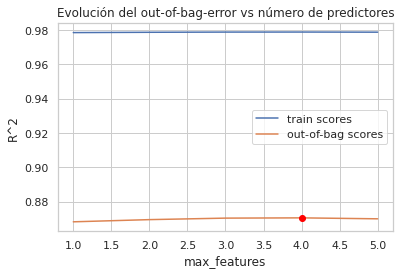

In [75]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, x_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 50
             )
    modelo.fit(x_train, y_train.transpose()[0])
    train_scores.append(modelo.score(x_train, y_train.transpose()[0]))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 4


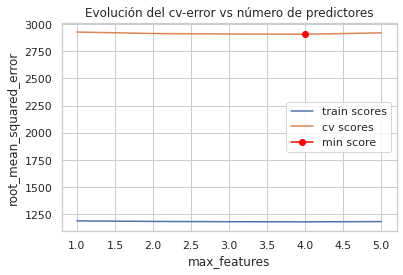

In [78]:
 #Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, x_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(x_train, y_train.transpose()[0])
    predicciones = modelo.predict(X = x_train)
    rmse = mean_squared_error(
            y_true  = y_train.transpose()[0],
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = x_train,
                y         = y_train.transpose()[0],
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Y parece que el mejor número de características es 4, por lo que parece que en efecto es mejor quitar la variable tax.

In [79]:
from sklearn.model_selection import ParameterGrid
import multiprocessing

Probemos otro método para calcular los mejores valores.

In [80]:
# VERSIÓN PARALELIZADA
# ==============================================================================

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [10,50, 100],
                 'max_features': [4, 5],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 123,
        ** params            
    )
    
    modelo.fit(X, y)
    
    if verbose:
        print(f"Modelo: {params} \u2713")
        
    return{'params': params, 'oob_r2': modelo.oob_score_}


n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(x_train, y_train.transpose()[0], RandomForestRegressor(), params) for params in param_grid]
             )

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': None, 'max_features': 4, 'n_estimators': 10} ✓
Modelo: {'max_depth': None, 'max_features': 4, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 4, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': 3, 'max_features': 4, 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 4, 'n_estimators': 50} ✓
Modelo: {'max_depth': 3, 'max_features': 4, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': 10, 'max_features': 4, 'n_estimators': 10} ✓
Modelo: {'max_depth': 10, 'max_features': 4, 'n_estimators': 50} ✓
Modelo: {'max_depth': 10, 'max_features': 4, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': 20, 'max_features': 4, 'n_estimators': 10} ✓
Modelo: {'max_depth': 20, 'max_features': 4, 'n_estimators': 50} ✓
Modelo: {'max_depth': 20, 'max_features': 4, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 10} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 100} ✓


,oob_r2,max_depth,max_features,n_estimators
20,0.880699,20.0,4.0,100.0
23,0.879414,20.0,5.0,100.0
19,0.878663,20.0,4.0,50.0
22,0.877695,20.0,5.0,50.0


El mejor parece ser el que tiene max_depth=20, max_features=4, y n_estimators=100. Probemos ahora con validación cruzada (ADVERTENCIA: Esto puede tomar mucho tiempo).

In [81]:
# Grid de hiperparámetros evaluados
# ==============================================================================
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
param_grid = {'n_estimators': [10, 50, 100],
              'max_features': [4, 5],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = x_train, y = y_train.transpose()[0])

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
20,20,4,100,-2816.967917,27.994814,-1492.912666,7.056511
19,20,4,50,-2823.985996,29.134421,-1504.253183,7.009867
23,20,5,100,-2833.162272,26.900381,-1495.006540,9.222934
22,20,5,50,-2839.663328,27.592883,-1505.868627,8.961044


In [82]:


# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)



----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 20, 'max_features': 4, 'n_estimators': 100} : -2816.9679172782007 neg_root_mean_squared_error


Obtuvimos los mismos resultados, ahora veamos qué tanto mejora el resultado.

In [87]:


# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = x_test)
rmse = mean_squared_error(
        y_true  = y_test.transpose()[0],
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 2850.5306186055104


Después de tanto esfuerzo, logramos reducir más el RMSE. Aunque las mejoras no son muy sorprendentes. Bien podríamos quedarnos con un modelo de redes neuronales, aunque el primer random forest que entrenamos era bastante bueno y más rápido de entrenar, y no requirió pensar mucho en los parámetros.
Ahora veamos qué características son más importantes para determinar el precio.

In [93]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,engineSize,0.446191
0,year,0.342332
1,mileage,0.112777
3,mpg,0.088114
2,tax,0.010586


In [94]:
from sklearn.inspection import permutation_importance


importancia = permutation_importance(
                estimator    = modelo_final,
                X            = x_train,
                y            = y_train.transpose()[0],
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = x_train.columns
df_importancia.sort_values('importances_mean', ascending=False)



,importances_mean,importances_std,feature
4,6255.004030,22.793925,engineSize
0,4441.016377,7.224791,year
3,2873.269529,6.872562,mpg
1,2350.427231,8.245589,mileage
2,1209.221703,11.496741,tax


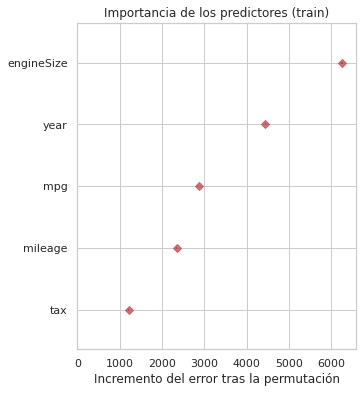

In [95]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

En efecto, *tax* era la variable menos importante, mientras que **engineSize** y **year** son las más importantes para determinar el precio. 

Por último, usemos un Pipeline para usar variables tanto numéricas como categóricas, y veamos xomo un Random forest se desempeña en este caso.

In [130]:
# Hacer partición de training y testing
X_train_full, X_valid_full, y_train, y_valid = train_test_split(df.drop(columns='price'), df['price'], test_size = 0.2,random_state =42)

# Nos interesan las variables categoricas con pocos unique values (no queremos infinidad de categorías)
# Para eso solo queremos variables con maximo 10 unique values
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# seleccionar solo las numéricas
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Quedarse solo con las variables seleccionadas
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocesar datos numéricos
numerical_transformer = SimpleImputer(strategy='constant')

# preprocesar datos categóricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Juntar variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [132]:
modelo = RandomForestRegressor(n_estimators=100, random_state=0)

In [133]:
# Conjuntar los datos preprocesados y hacer el fit
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', modelo)
                             ])

# Enbonar el training
my_pipeline.fit(X_train, y_train)

# Adjuntar el training data y terminar el fit
preds = my_pipeline.predict(X_valid)

# Siguiente paso: evaluación del modelo
score_MAE = mean_absolute_error(y_valid, preds)
score_RMSE = mean_squared_error(y_valid, preds, squared=False)
print('MAE:', score_MAE)
print('RMSE: ', score_RMSE )

MAE: 1626.5311152057686
RMSE:  2416.05583015647


¡Ahora si hemos superado por mucho a los modelos anteriores! Por lo tanto el random forest es mucho más adecuado para regresiones que los demás modelos entrenados. Con las redes neuronales podríamos agregar más capas o ajustar los parámetros, pero caemos en el riesgo del overfitting y son más tardadas de entrenar que nuestro random forest.


## Clusterización

In [99]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df2 = X.copy()
df2[df2.columns] = std_scaler.fit_transform(df2)

In [101]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(df2)

In [105]:
print("Varianza acumulada explicada por mis dos nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_))) 

Varianza acumulada explicada por mis dos nuevas variables: 72.85%


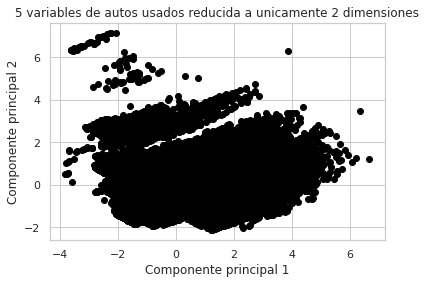

In [106]:
plt.scatter(x=pca_2_resultados[:,0],y=pca_2_resultados[:,1], color = "black")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("5 variables de autos usados reducida a unicamente 2 dimensiones")
plt.show()

In [112]:
# Generación de clusterización

from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

In [107]:


inertia = []
for i in range (1,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state=18)
  kmeans.fit(df2)
  inertia.append(kmeans.inertia_)

In [108]:
# Generación del método confirmatorio: método de la silueta

from sklearn.metrics import silhouette_score

silueta = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++', n_init=15, max_iter=500,random_state=18)
    kmeans.fit(df2)
    silueta[i] = silhouette_score(df2, kmeans.labels_, metric='euclidean')

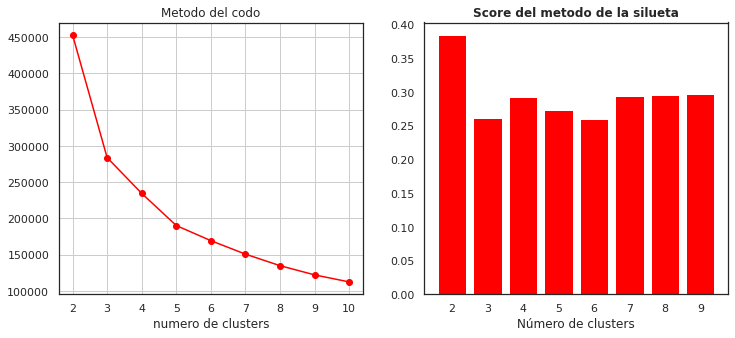

In [109]:
# Vamos a graficar el método del codo y su complementario
sns.set(style="white", rc={"figure.figsize":(12,5)})
plt.subplot(1,2,1)

plt.plot(range(2,len(inertia)+2), inertia, marker="o", color ="red")
plt.xlabel("numero de clusters")
plt.title("Metodo del codo")
plt.grid(True)

plt.subplot(1,2,2)


plt.bar(range(len(silueta)), list(silueta.values()), align ="center", color ="red")
plt.xticks(range(len(silueta)), list(silueta.keys()))
plt.title("Score del metodo de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()

Por la silueta vemos que tener 2 clusters nos da la mejor puntuación, veamos qué obtenemos usando dos.

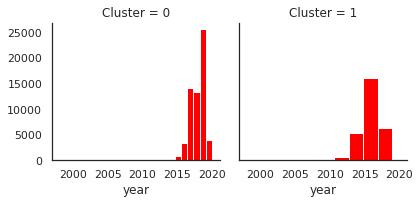

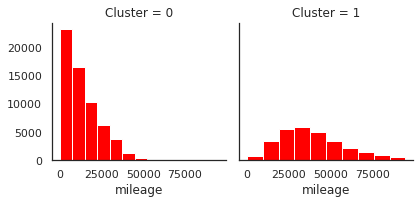

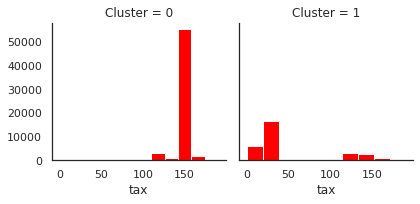

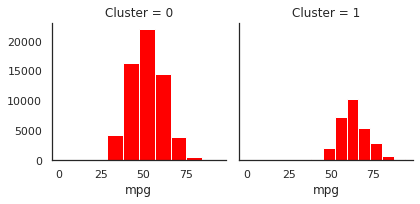

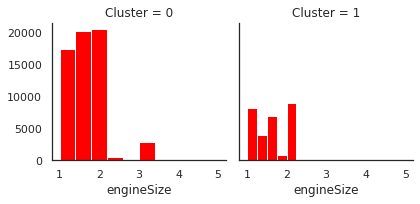

In [113]:
kmeans = cluster.KMeans(n_clusters=2, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(df2)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)



data2= X.copy()
data2["Cluster"] = kmeans_labels

aux = data2.columns.tolist()
aux[0:len(aux)-1]

for clusteri in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(data2,col="Cluster")
  grid.map(plt.hist, clusteri, color = "red")

Text(0, 0.5, 'componente 2')

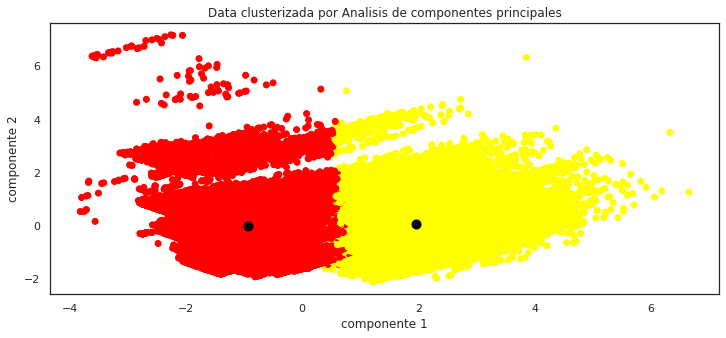

In [114]:
plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap = "autumn")
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker="o", color = "black", linewidths=4, zorder =10)
plt.title("Data clusterizada por Analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

Ahora vamos a visualizar las variables no numéricas.

In [118]:
# numero de casas por suburbios
import plotly.express as px
transmission = df.transmission.value_counts()


fig = px.bar(transmission, y=transmission.values, x=transmission.index, text=transmission.values, color=transmission.index,
             labels={'y': 'Número de autos', 'index': 'Tipo de transmisión'},
             title='Transmisiones',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [119]:
# numero de casas por suburbios
modelos = df.model.value_counts()
others = modelos[30:].sum()
modelos = modelos[:30]

fig = px.bar(modelos, y=modelos.values, x=modelos.index, text=modelos.values, color=modelos.index,
             labels={'y': 'Número de autos', 'index': 'Nombre del modelo'},
             title='Top 30 de modelos que aparecen en el dataset',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()